# Titanic Survival Prediction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

####  Data Dictionary:

|**Variable**|**Definition**|**Key**|
|--|--|--|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years|
|sibsp| of siblings or spouses aboard the Titanic|
|parch| of parents or children aboard the Titanic|
|ticket|Ticket number|
|fare|Passenger fare|
|cabin|Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

#### Variable Notes:

pclass: A proxy for socio-economic status (SES)

     1st = Upper
     2nd = Middle
     3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

      Sibling = brother, sister, stepbrother, stepsister
      Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

      Parent = mother, father
      Child = daughter, son, stepdaughter, stepson
      Some children travelled only with a nanny, therefore parch=0 for them.

In [508]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [509]:
# Importing Train Data
traindf=pd.read_csv(r"C:\Users\srava\github projects\project on Titanic Survival Prediction\train.csv")

In [510]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [511]:
traindf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [512]:
# Importing Test data
testdf=pd.read_csv(r"C:\Users\srava\github projects\project on Titanic Survival Prediction\test.csv")

In [513]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [514]:
testdf.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [515]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [516]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [517]:
# Adding an extra column to test data before combining
testdf["Survived"]="test"

In [518]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [519]:
# Combining both train and test data 
combinedf=pd.concat([traindf,testdf],axis=0,ignore_index=True)

In [520]:
combinedf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [521]:
combinedf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,test,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,test,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,test,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,test,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,test,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [522]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [523]:
# Checking for null values
combinedf.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [524]:
combinedf.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [525]:
combinedf.Age=combinedf.Age.fillna(combinedf.Age.median())

In [526]:
combinedf.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [527]:
combinedf.Fare=combinedf.Fare.fillna(combinedf.Fare.median())

In [528]:
combinedf.Cabin.value_counts(dropna=False)

Cabin
NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [529]:
combinedf.Cabin=combinedf.Cabin.fillna(combinedf.Cabin.mode()[0])

In [530]:
combinedf.Cabin.unique()

array(['C23 C25 C27', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [531]:
combinedf.Cabin=combinedf.Cabin.str.replace(" ","")

In [532]:
combinedf['Cabin']=combinedf.Cabin.apply(lambda x:x[0])

In [533]:
combinedf.Cabin.isnull().sum()

0

In [534]:
combinedf.Cabin.value_counts()

Cabin
C    1108
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [536]:
combinedf.Embarked.value_counts(dropna=False)

Embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

In [537]:
combinedf.Embarked=combinedf.Embarked.fillna(combinedf.Embarked.mode()[0])

In [538]:
# All null values are filled
combinedf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [539]:
# Checking for Nan values
combinedf.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [540]:
# # Checking for Duplicate values
combinedf.duplicated().sum()

0

In [541]:
combinedf.Pclass.value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [542]:
combinedf.Pclass=combinedf.Pclass.astype("object")

In [543]:
combinedf.SibSp.value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [544]:
combinedf.SibSp=combinedf.SibSp.astype("object")

In [545]:
combinedf.Parch.value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

In [546]:
combinedf.Parch=combinedf.Parch.astype("object")

In [547]:
combinedf.Age=combinedf.Age.astype(int)

### EDA

In [548]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [549]:
traindf.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Data Visualisation

<Axes: ylabel='count'>

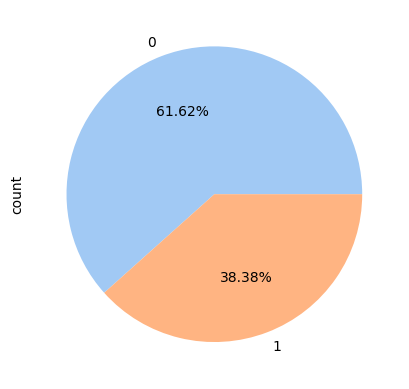

In [550]:
colors = sns.color_palette('pastel')[0:len(traindf.Survived)]
traindf.Survived.value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors)

<Axes: ylabel='count'>

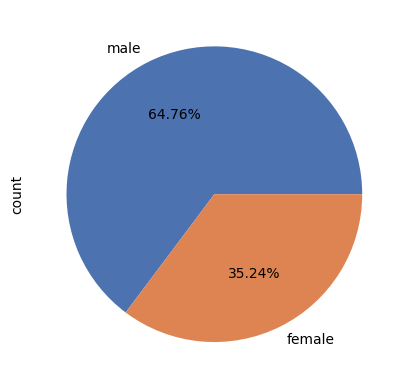

In [551]:
colors = sns.color_palette('deep')[0:len(traindf.Sex)]
traindf.Sex.value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors)

<Axes: ylabel='count'>

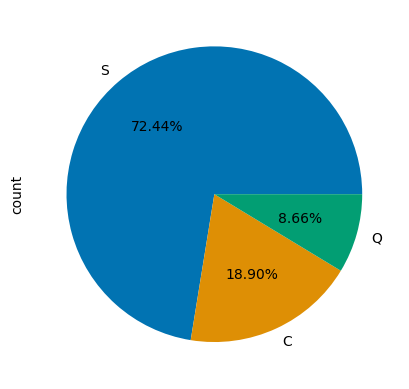

In [552]:
colors = sns.color_palette('colorblind')[0:len(traindf.Embarked)]
traindf.Embarked.value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors)

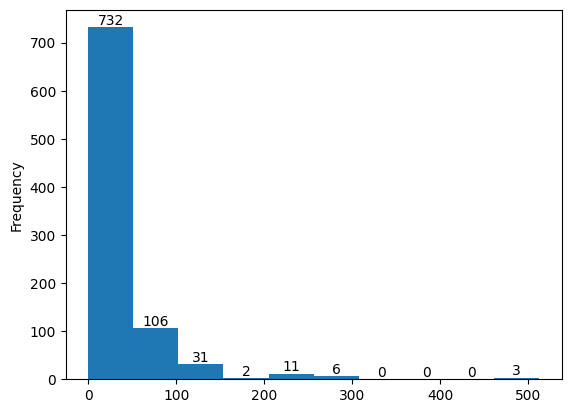

In [553]:
ax=traindf.Fare.plot(kind="hist")
for i in ax.containers:
    ax.bar_label(i,label_type="edge")

<Axes: >

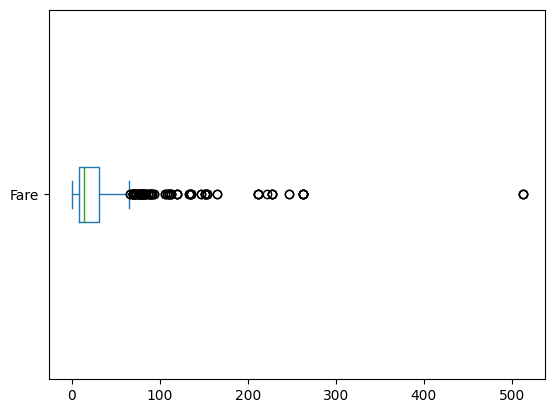

In [554]:
traindf.Fare.plot(kind="box",vert=False)

<Axes: ylabel='Density'>

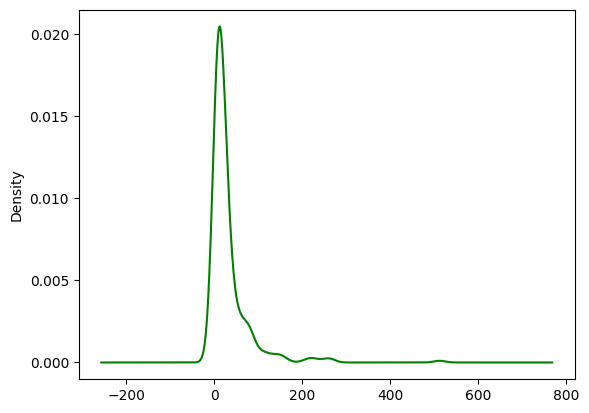

In [555]:
traindf.Fare.plot(kind="density",color="green")

<Figure size 3000x1500 with 0 Axes>

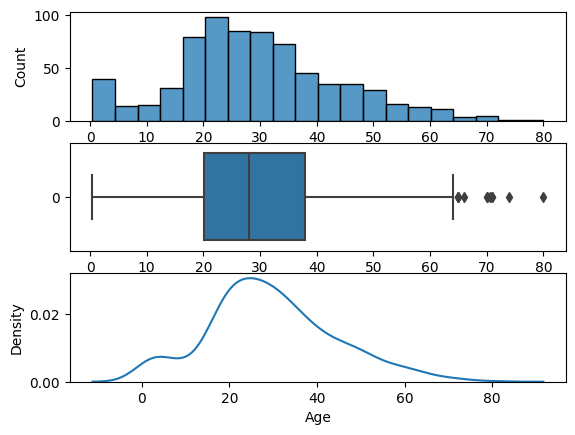

In [556]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(traindf.Age,ax=ax[0])
sns.boxplot(traindf.Age,orient="h",ax=ax[1])
sns.kdeplot(traindf.Age,ax=ax[2])
plt.show()

In [557]:
pd.crosstab(traindf.SibSp,traindf.Parch)

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


In [558]:
pd.crosstab(combinedf.Cabin,traindf.Survived)

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,505,241
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0


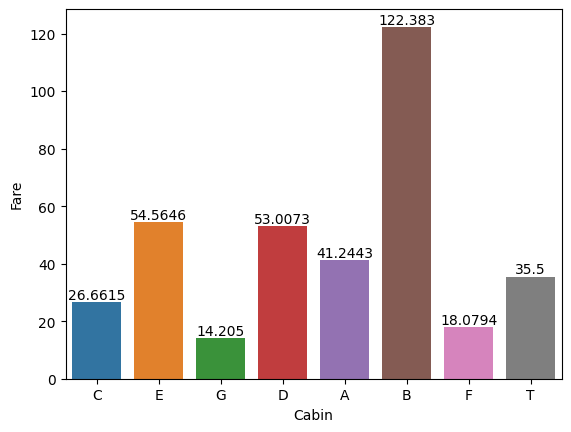

In [559]:
ax=sns.barplot(combinedf,x="Cabin",y="Fare",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

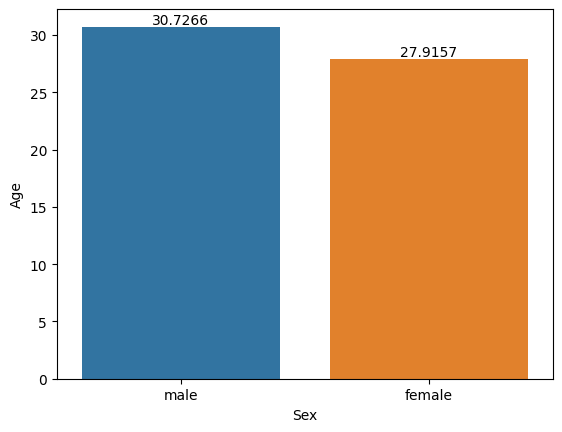

In [560]:
ax=sns.barplot(traindf,x="Sex",y="Age",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

## Data Aggregation

In [562]:
# What is the Average fare of different pclass ?
traindf.Fare.groupby(traindf.Pclass).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [563]:
# What is the Average survived rate of different age group ?
traindf.Age.groupby(traindf.Survived).mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### Hypothesis Testing

In [564]:
# Test the null average fare for different pclass
traindf.Fare.groupby(traindf.Pclass).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [565]:
#Null:There is no significante difference between average fare for different pclasses
#Alternate:There is a significante difference between average fare for different pclasses

In [566]:
first_class=traindf[traindf.Pclass==1]
second_class=traindf[traindf.Pclass==2]
third_class=traindf[traindf.Pclass==3]

In [567]:
from scipy.stats import f_oneway

In [568]:
f_oneway(first_class.Fare,second_class.Fare,third_class.Fare)

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

In [569]:
# since pvalue=1.0313763209141171e-84 is lessthan 0.05 we reject null hypothesis
# we may conclude that there is a significante difference between average Fare for different pclasses

In [570]:
#Test Null No Association between survived and sex
pd.crosstab(traindf.Survived,traindf.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [571]:
from scipy.stats import chi2_contingency

In [572]:
#Null - There is no Association between survived and sex
#Alt - There is Association between survived and sex

In [573]:
chi2_contingency(pd.crosstab(traindf.Survived,traindf.Sex))
# since pvalue = 1.1973570627755645e-58  is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))

In [574]:
# splitting data into numcols and objcols

In [575]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=["object"])

In [576]:
print(numcols.shape)
print(objcols.shape)

(1309, 3)
(1309, 9)


In [577]:
numcols.head()

,PassengerId,Age,Fare
0,1,22,7.2500
1,2,38,71.2833
2,3,26,7.9250
3,4,35,53.1000
4,5,35,8.0500


In [578]:
numcols.describe()

,PassengerId,Age,Fare
count,1309.000000,1309.000000,1309.000000
mean,655.000000,29.484339,33.281086
std,378.020061,12.916721,51.741500
min,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800
50%,655.000000,28.000000,14.454200
75%,982.000000,35.000000,31.275000
max,1309.000000,80.000000,512.329200


In [579]:
numcols.corr()

,PassengerId,Age,Fare
PassengerId,1.000000,0.025592,0.031128
Age,0.025592,1.000000,0.178272
Fare,0.031128,0.178272,1.000000


<Axes: >

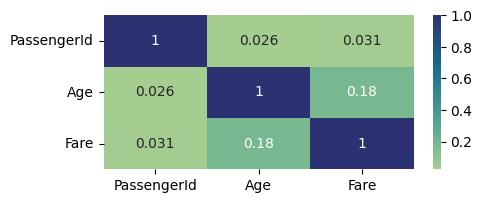

In [580]:
plt.figure(figsize=(5,2))
sns.heatmap(numcols.corr(),annot=True,cmap="crest")

In [581]:
objcols.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,C,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,C,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,C,S


In [582]:
objcols=objcols.drop(["Name","Ticket"],axis=1)

In [583]:
objcols.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,C,S
1,1,1,female,1,0,C,C
2,1,3,female,0,0,C,S
3,1,1,female,1,0,C,S
4,0,3,male,0,0,C,S


In [584]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  1309 non-null   object
 1   Pclass    1309 non-null   object
 2   Sex       1309 non-null   object
 3   SibSp     1309 non-null   object
 4   Parch     1309 non-null   object
 5   Cabin     1309 non-null   object
 6   Embarked  1309 non-null   object
dtypes: object(7)
memory usage: 71.7+ KB


In [585]:
numcols["Survived"]=objcols.Survived

In [586]:
objcols=objcols.drop("Survived",axis=1)

In [587]:
objcols_dummy=pd.get_dummies(objcols,columns=objcols.columns)

In [588]:
objcols_dummy.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,True,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,False,False,True,True,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,True,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [589]:
objcols_dummy.replace({True:1,False:0},inplace=True)

In [590]:
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [591]:
combinedf_clean.head()

,PassengerId,Age,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,22,7.2500,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2,38,71.2833,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,26,7.9250,1,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,35,53.1000,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,35,8.0500,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [592]:
combinedf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Age          1309 non-null   int32  
 2   Fare         1309 non-null   float64
 3   Survived     1309 non-null   object 
 4   Pclass_1     1309 non-null   int64  
 5   Pclass_2     1309 non-null   int64  
 6   Pclass_3     1309 non-null   int64  
 7   Sex_female   1309 non-null   int64  
 8   Sex_male     1309 non-null   int64  
 9   SibSp_0      1309 non-null   int64  
 10  SibSp_1      1309 non-null   int64  
 11  SibSp_2      1309 non-null   int64  
 12  SibSp_3      1309 non-null   int64  
 13  SibSp_4      1309 non-null   int64  
 14  SibSp_5      1309 non-null   int64  
 15  SibSp_8      1309 non-null   int64  
 16  Parch_0      1309 non-null   int64  
 17  Parch_1      1309 non-null   int64  
 18  Parch_2      1309 non-null   int64  
 19  Parch_

In [593]:
combinedf_clean=combinedf_clean.drop(["PassengerId","Fare"],axis=1)

In [594]:
combinedf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         1309 non-null   int32 
 1   Survived    1309 non-null   object
 2   Pclass_1    1309 non-null   int64 
 3   Pclass_2    1309 non-null   int64 
 4   Pclass_3    1309 non-null   int64 
 5   Sex_female  1309 non-null   int64 
 6   Sex_male    1309 non-null   int64 
 7   SibSp_0     1309 non-null   int64 
 8   SibSp_1     1309 non-null   int64 
 9   SibSp_2     1309 non-null   int64 
 10  SibSp_3     1309 non-null   int64 
 11  SibSp_4     1309 non-null   int64 
 12  SibSp_5     1309 non-null   int64 
 13  SibSp_8     1309 non-null   int64 
 14  Parch_0     1309 non-null   int64 
 15  Parch_1     1309 non-null   int64 
 16  Parch_2     1309 non-null   int64 
 17  Parch_3     1309 non-null   int64 
 18  Parch_4     1309 non-null   int64 
 19  Parch_5     1309 non-null   int64 
 20  Parch_6 

In [596]:
# split data back into train and test
train=combinedf_clean[combinedf_clean.Survived!="test"]
test=combinedf_clean[combinedf_clean.Survived=="test"]

In [599]:
test=test.drop("Survived",axis=1)

In [600]:
train.head()

,Age,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,22,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,26,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,35,0,0,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [601]:
test.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
891,34,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
892,47,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
893,62,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
894,27,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
895,22,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [602]:
y=train.Survived
X=train.drop("Survived",axis=1)

In [603]:
from sklearn.preprocessing import LabelEncoder

In [604]:
y=LabelEncoder().fit_transform(y)

### Logistic Regression

In [605]:
from sklearn.linear_model import LogisticRegression

In [612]:
logit=LogisticRegression(max_iter=500)

In [613]:
logitmodel=logit.fit(X,y)

In [614]:
logitmodel.score(X,y)

0.8249158249158249

In [616]:
from sklearn.metrics import RocCurveDisplay,classification_report

In [617]:
from sklearn.model_selection import cross_val_score

In [618]:
cross_val_score(logit,X,y)

array([0.79888268, 0.82022472, 0.80337079, 0.80898876, 0.80337079])

In [619]:
np.mean([0.79888268, 0.82022472, 0.80337079, 0.80898876, 0.80337079])

0.8069675479999999

In [620]:
logitpredict=logitmodel.predict(X)

In [621]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



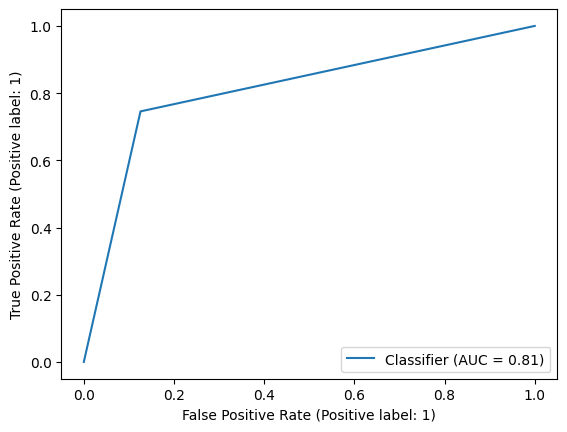

In [622]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [693]:
logitpredict=logitmodel.predict(test)

In [694]:
pd.DataFrame(logitpredict).to_csv('logit.csv')

### Decision Tree

In [623]:
from sklearn.tree import DecisionTreeClassifier

In [624]:
tree=DecisionTreeClassifier(max_depth=3)

In [625]:
treemodel=tree.fit(X,y)

In [626]:
treemodel.score(X,y)

0.8237934904601572

In [630]:
cross_val_score(tree,X,y)

array([0.77653631, 0.8258427 , 0.78651685, 0.78089888, 0.81460674])

In [631]:
np.mean([0.77653631, 0.8258427 , 0.78651685, 0.78089888, 0.81460674])

0.796880296

In [632]:
treepredict=treemodel.predict(X)

In [633]:
pd.crosstab(y,treepredict)

col_0,0,1
row_0,,
0,519,30
1,127,215


In [634]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       549
           1       0.88      0.63      0.73       342

    accuracy                           0.82       891
   macro avg       0.84      0.79      0.80       891
weighted avg       0.83      0.82      0.82       891



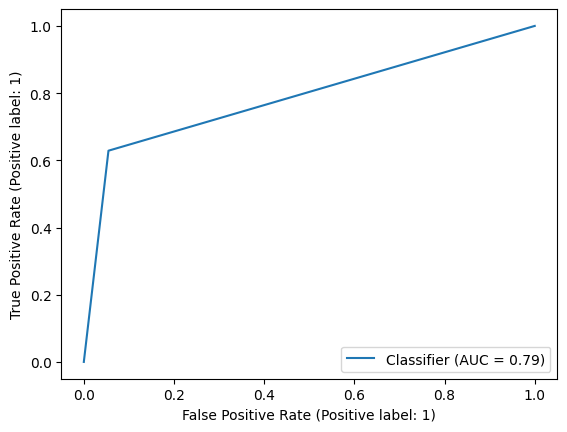

In [635]:
RocCurveDisplay.from_predictions(y,treepredict)

In [695]:
treepredict=treemodel.predict(test)

In [696]:
pd.DataFrame(treepredict).to_csv("tree.csv")

### Random Forest

In [636]:
from sklearn.ensemble import RandomForestClassifier

In [637]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=4)

In [638]:
rfmodel=rf.fit(X,y)

In [639]:
rfmodel.score(X,y)

0.8338945005611672

In [640]:
cross_val_score(rf,X,y)

array([0.81005587, 0.82022472, 0.82022472, 0.79775281, 0.80898876])

In [642]:
np.mean([0.81005587, 0.82022472, 0.82022472, 0.79775281, 0.80898876])

0.811449376

In [643]:
rfpredict=rfmodel.predict(X)

In [644]:
pd.crosstab(y,rfpredict)

col_0,0,1
row_0,,
0,507,42
1,106,236


In [645]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       549
           1       0.85      0.69      0.76       342

    accuracy                           0.83       891
   macro avg       0.84      0.81      0.82       891
weighted avg       0.84      0.83      0.83       891



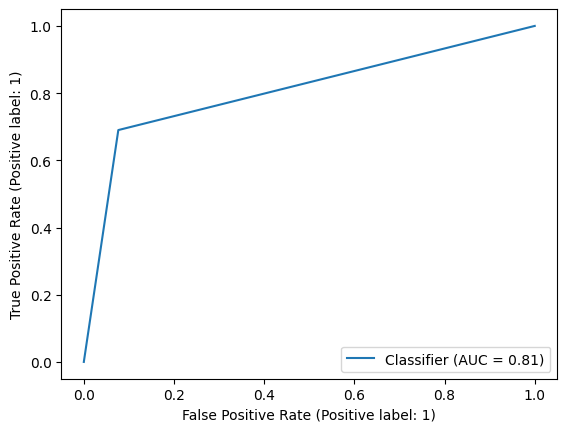

In [646]:
RocCurveDisplay.from_predictions(y,rfpredict)

In [697]:
rfpredict=rfmodel.predict(test)

In [698]:
pd.DataFrame(rfpredict).to_csv("rf.csv")

### Gradient Boosting

In [647]:
from sklearn.ensemble import GradientBoostingClassifier

In [735]:
gbc=GradientBoostingClassifier(n_estimators=500,max_depth=4)

In [736]:
gbcmodel=gbc.fit(X,y)

In [737]:
gbcmodel.score(X,y)

0.9382716049382716

In [738]:
cross_val_score(gbc,X,y)

array([0.78212291, 0.78651685, 0.80337079, 0.82022472, 0.84831461])

In [739]:
np.mean([0.80446927, 0.79775281, 0.80898876, 0.81460674, 0.84269663])

0.813702842

In [740]:
gbcpredict=gbcmodel.predict(X)

In [741]:
pd.crosstab(y,gbcpredict)

col_0,0,1
row_0,,
0,539,10
1,45,297


In [742]:
print(classification_report(y,gbcpredict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       549
           1       0.97      0.87      0.92       342

    accuracy                           0.94       891
   macro avg       0.95      0.93      0.93       891
weighted avg       0.94      0.94      0.94       891



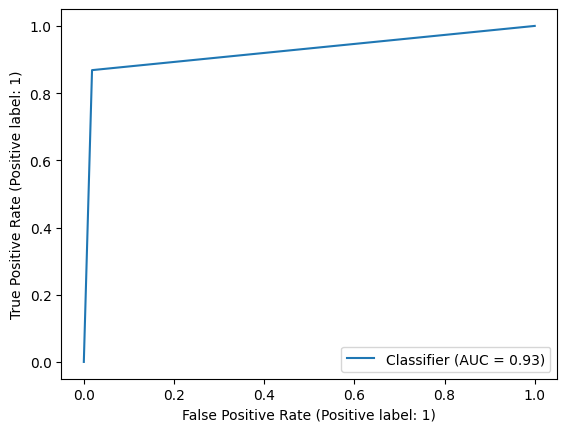

In [743]:
RocCurveDisplay.from_predictions(y,gbcpredict)

In [746]:
gbcpredict=gbcmodel.predict(test)

In [747]:
pd.DataFrame(gbcpredict).to_csv("gbc.csv")

### Naive Bayes

In [662]:
from sklearn.naive_bayes import MultinomialNB

In [663]:
mnb=MultinomialNB()

In [664]:
mnbmodel=mnb.fit(X,y)

In [665]:
mnbmodel.score(X,y)

0.7811447811447811

In [666]:
cross_val_score(mnb,X,y)

array([0.70949721, 0.78651685, 0.79213483, 0.78089888, 0.79213483])

In [667]:
np.mean([0.70949721, 0.78651685, 0.79213483, 0.78089888, 0.79213483])

0.7722365200000001

In [668]:
mnbpredict=mnbmodel.predict(X)

In [669]:
pd.crosstab(y,mnbpredict)

col_0,0,1
row_0,,
0,466,83
1,112,230


In [670]:
print(classification_report(y,mnbpredict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.73      0.67      0.70       342

    accuracy                           0.78       891
   macro avg       0.77      0.76      0.76       891
weighted avg       0.78      0.78      0.78       891



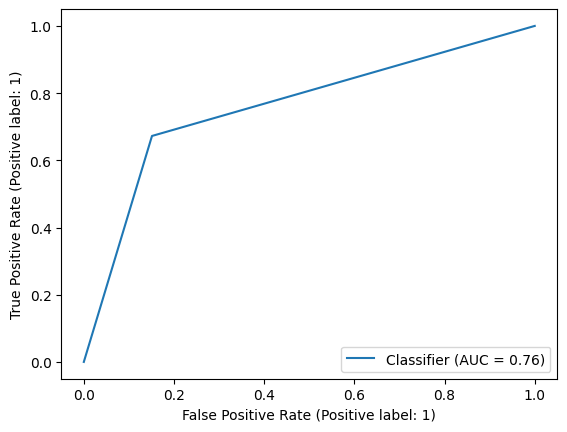

In [671]:
RocCurveDisplay.from_predictions(y,mnbpredict)

In [701]:
nbpredict=mnbmodel.predict(test)

In [702]:
pd.DataFrame(nbpredict).to_csv("nb.csv")

### Support Vector Machine

In [672]:
from sklearn.svm import SVC

In [673]:
svc=SVC(C=5)

In [674]:
svcmodel=svc.fit(X,y)

In [675]:
svcmodel.score(X,y)

0.7957351290684624

In [676]:
cross_val_score(svc,X,y)

array([0.7877095 , 0.80898876, 0.78651685, 0.75280899, 0.80898876])

In [677]:
np.mean([0.7877095 , 0.80898876, 0.78651685, 0.75280899, 0.80898876])

0.789002572

In [678]:
svcpredict=svcmodel.predict(X)

In [679]:
pd.crosstab(y,svcpredict)

col_0,0,1
row_0,,
0,462,87
1,95,247


In [680]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       549
           1       0.74      0.72      0.73       342

    accuracy                           0.80       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.80      0.80       891



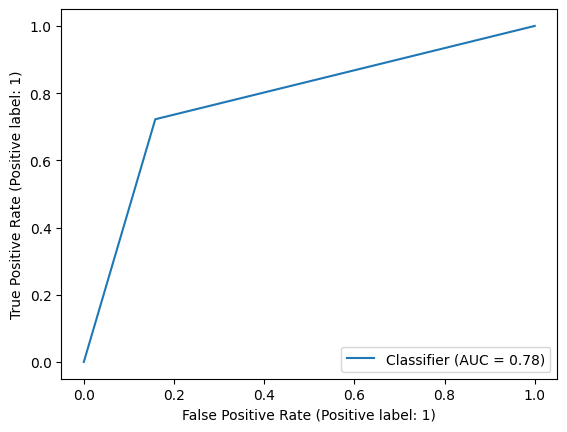

In [681]:
RocCurveDisplay.from_predictions(y,svcpredict)

In [703]:
svcpredict=svcmodel.predict(test)

In [704]:
pd.DataFrame(svcpredict).to_csv("sv.csv")

## Validating the scores in Kaggle

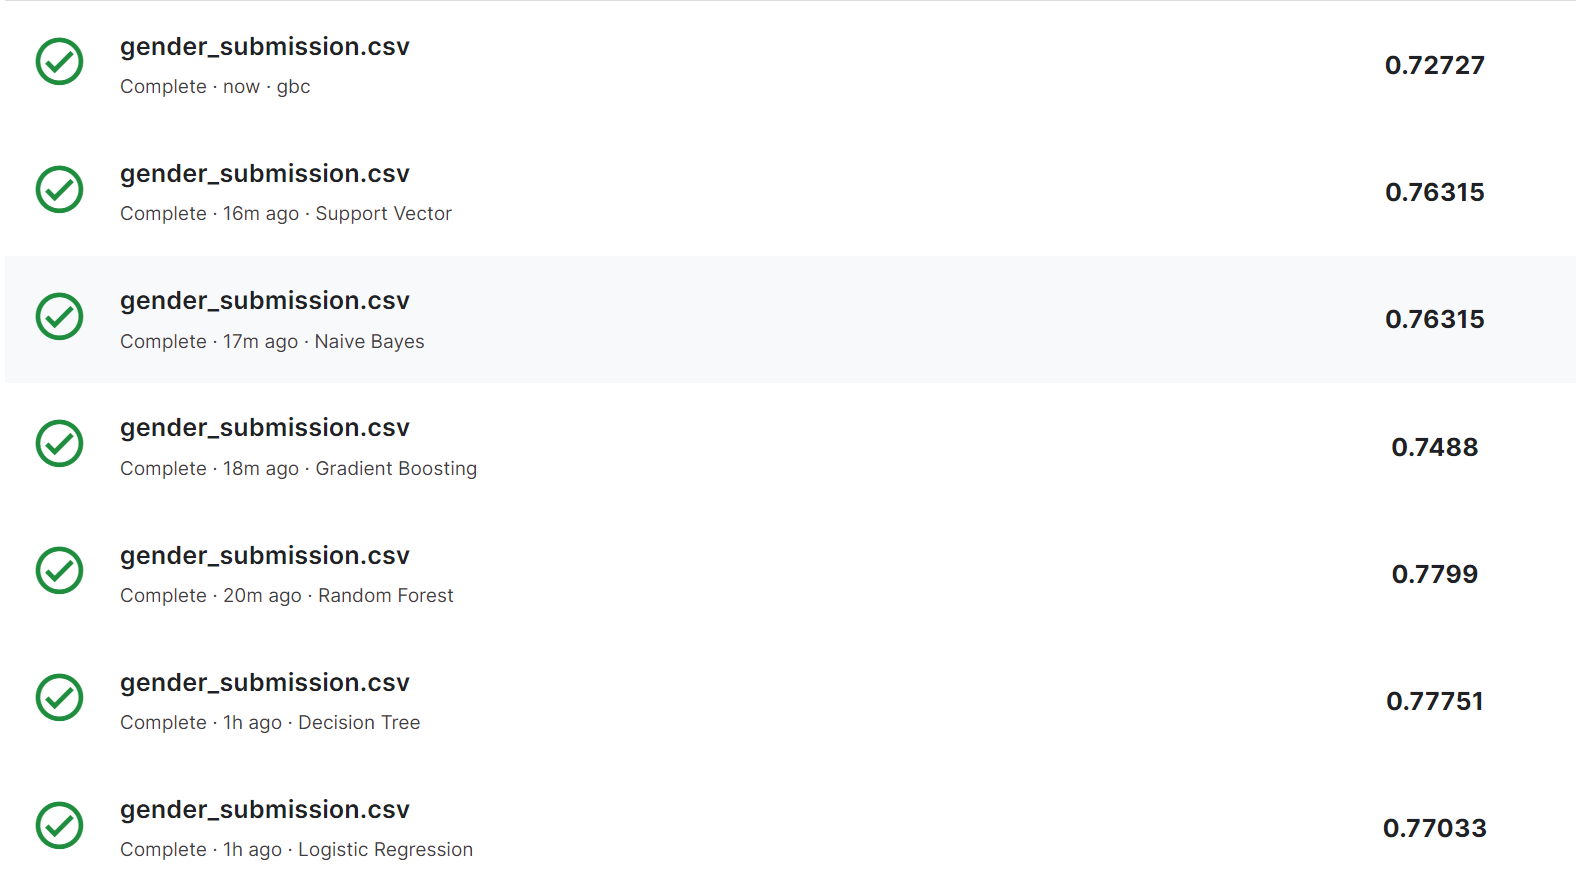

# Leaderboard of the competition

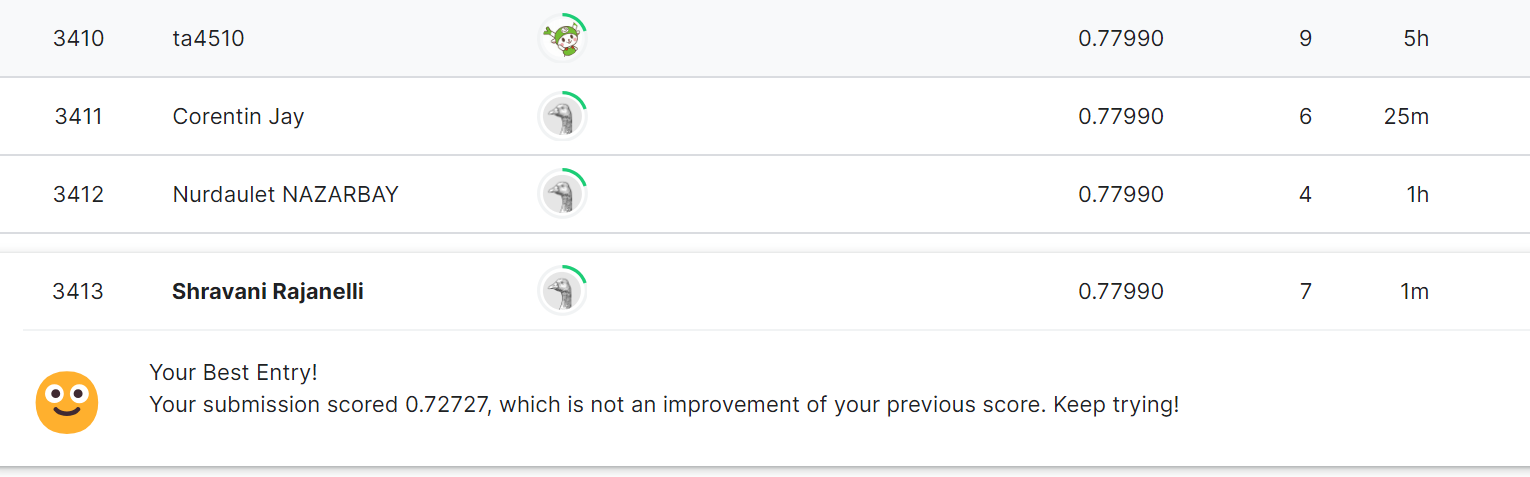

# Summary

After building and evaluating various machine learning models for , we have compiled additional information, including Precision,Recall (Sensitivity),F1-Score,ROC-AUC to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores,Accuracy,ROC-AUC values:

| Model Name | Accuracy | ROC-AUC |
|--|--|--|
| Logistic Regression | 0.8249158249158249 |0.81| 
| Decision Tree | 0.8237934904601572 | 0.79 |
| Random Forest |0.8338945005611672 | 0.81 |
| **Gradient Boosting Machine** | **0.9382716049382716** | **0.93**|
| Naive Bayes|0.7811447811447811|0.76
| Support Vector Machine | 0.7957351290684624 | 0.78 |

The "Gradient Boosting Machine" model stands out with a significantly higher Accuracy score compared to its counterparts, indicating its superior predictive performance for this dataset. The higher Accuracy value suggests that the Gradient Boosting Machine model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for Classification tasks where Catogorical prediction accuracy is crucial.

In light of these findings, it's advisable to consider theGradient Boosting Machine model as a more reliable option for Classification analysis on the Titanic survival prediction dataset, prioritizing Accuracy as the key performance indicator scores.